In [1]:
## Setup
from notebook_utils import resolve_paths_from_parent_directory
# auto reload notebook deps
%reload_ext autoreload
%autoreload 2
resolve_paths_from_parent_directory()

In [95]:
# imports
import datetime
from experiment_pipeline.data_loader import load_global_feature_set
from experiment_pipeline.feature_sets import baseline_important_features, baseline_important_features_with_stop_stats
from run_experiment import run_experiment
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor


data_dir = "../data"
route_str = "B46"
station_str = "JFK"
direction_int = 1


## Prepare globlal feature set
df_route, stop_id_ls = load_global_feature_set(data_dir, route_str, station_str, direction_int)


In [3]:
models = [LassoCV(), RandomForestRegressor(), XGBRegressor()]

for model in models:
    print(model)
    print('\n')
    experiment_eval = run_experiment(
            global_feature_set=df_route,
            feature_extractor_fn=baseline_important_features_with_stop_stats,
            model=model,
            stop_id_ls=stop_id_ls,
            dependent_variable="passenger_count",
            split_heuristic="datetime",
            test_size=0.1,
            split_datetime=datetime.datetime(year=2021, month=9, day=26, hour=0, minute=0),
            test_period="2D",
            refit_interval=None,
            random_state=0,
            experiment_name=None
        )
    print('\n')
    print("Train")
    model_pred_eval, mean_pred_eval = experiment_eval.basic_eval("train", pretty_print=True)
    print('\n')
    print('-----------------------------')
    print('\n')
    print("Test")
    model_pred_eval, mean_pred_eval = experiment_eval.basic_eval("test", pretty_print=True)
    print('\n')
    print('=============================')
    print('\n')

LassoCV()


split: fitting on train data until 2021-09-26 00:00:00: 109,931 rows
split: testing from 2021-09-26 00:00:00 to 2021-09-28 00:00:00: 2,782 rows
Fitting model...
Inference...


Train
Performance: Model Prediction
MAE: 5.8
ME : 80.0
R^2: 0.32


Performance: Mean Prediction
MAE: 7.4
ME : 74.3
R^2: 0.00


-----------------------------


Test
Performance: Model Prediction
MAE: 5.8
ME : 29.5
R^2: 0.26


Performance: Mean Prediction
MAE: 6.8
ME : 38.3
R^2: -0.01




RandomForestRegressor()


split: fitting on train data until 2021-09-26 00:00:00: 109,931 rows
split: testing from 2021-09-26 00:00:00 to 2021-09-28 00:00:00: 2,782 rows
Fitting model...
Inference...


Train
Performance: Model Prediction
MAE: 0.9
ME : 26.0
R^2: 0.98


Performance: Mean Prediction
MAE: 7.4
ME : 74.3
R^2: 0.00


-----------------------------


Test
Performance: Model Prediction
MAE: 5.4
ME : 30.9
R^2: 0.29


Performance: Mean Prediction
MAE: 6.8
ME : 38.3
R^2: -0.01




XGBRegressor(base_score=None, boos

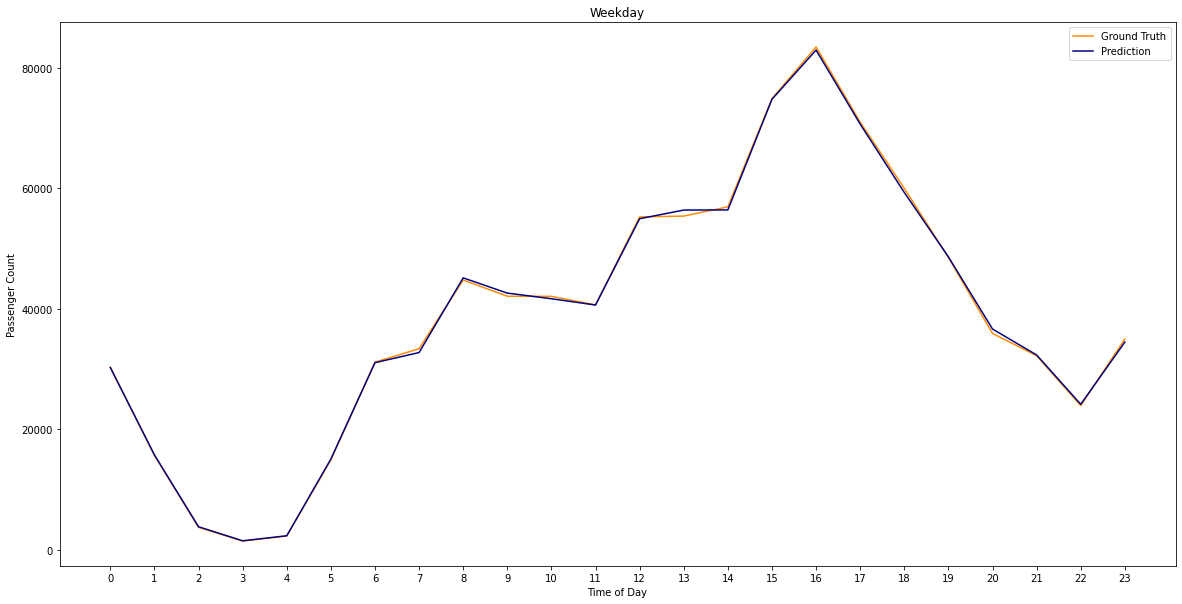

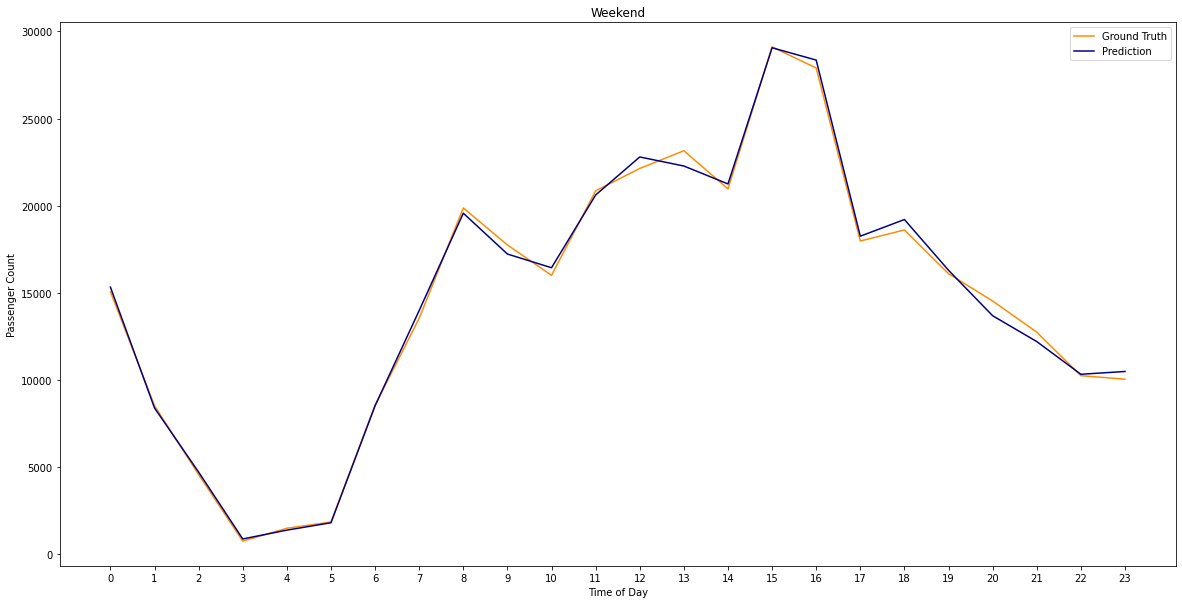

In [31]:
fig_weekday, fig_weekend = experiment_eval.plot_passenger_count_by_time_of_day('train', segment=None, agg='sum')

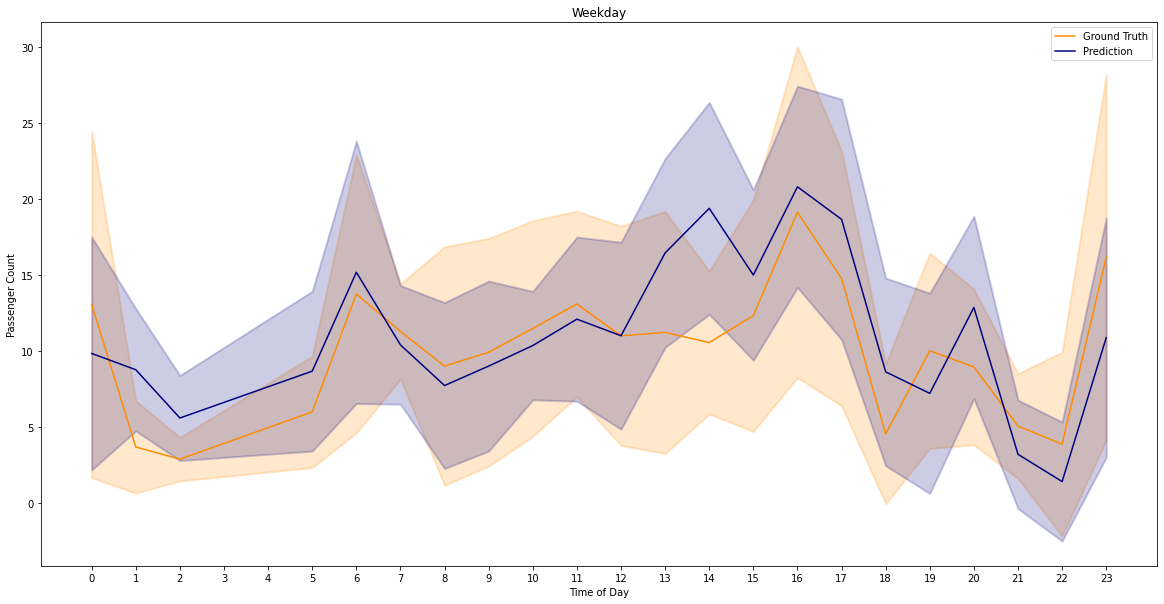

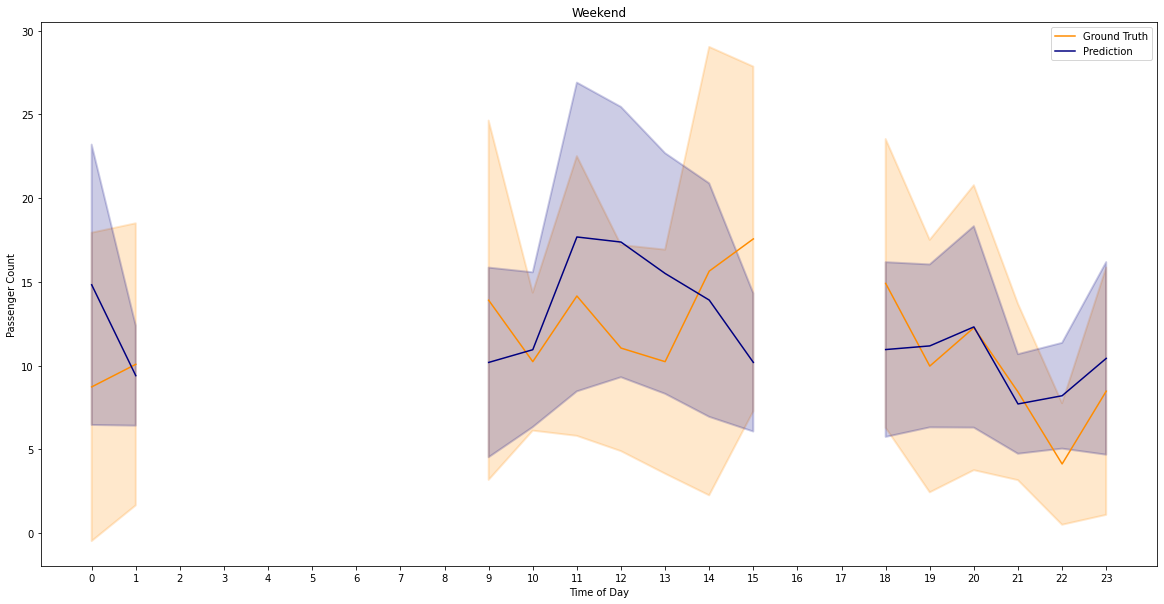

In [32]:
fig_weekday, fig_weekend = experiment_eval.plot_passenger_count_by_time_of_day('test', segment=None, agg='mean')

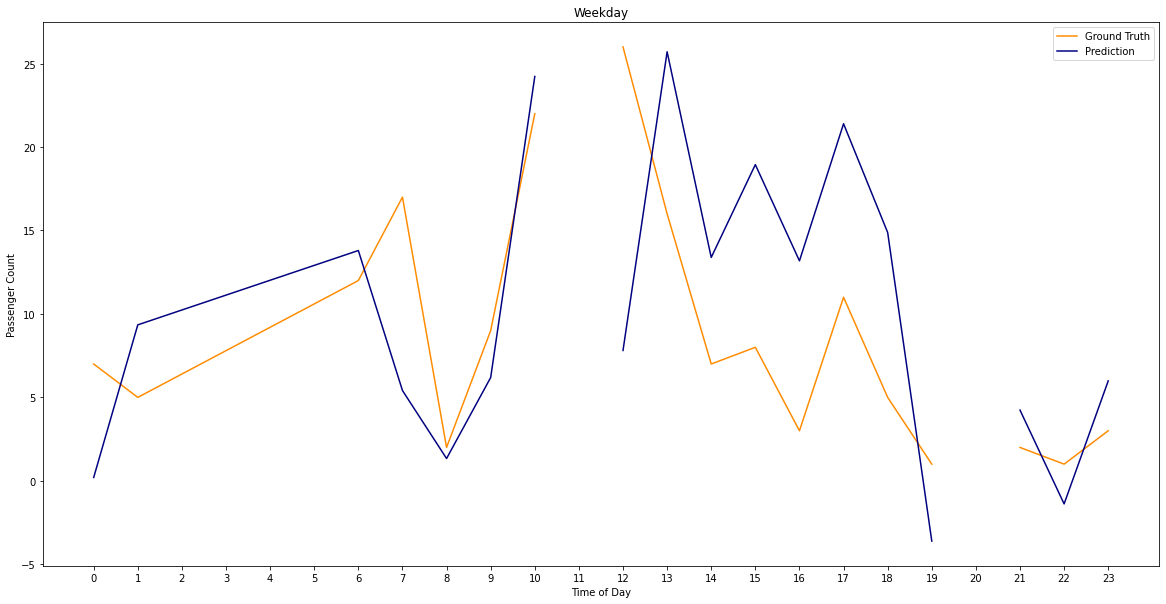

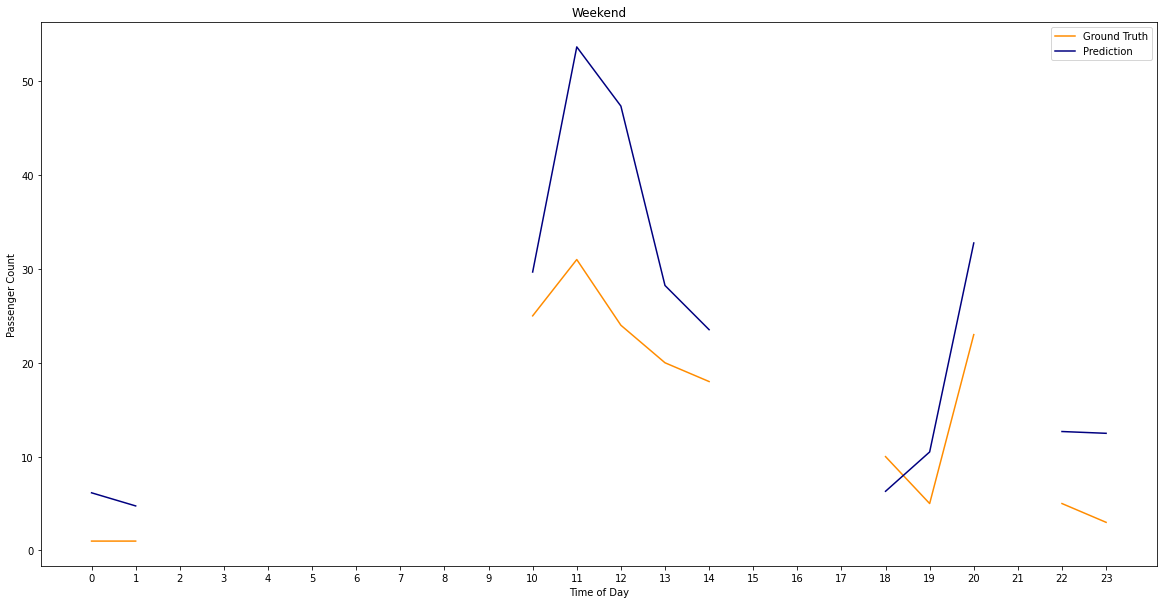

In [33]:
fig_weekday, fig_weekend = experiment_eval.plot_passenger_count_by_time_of_day('test', segment=46, agg='sum')

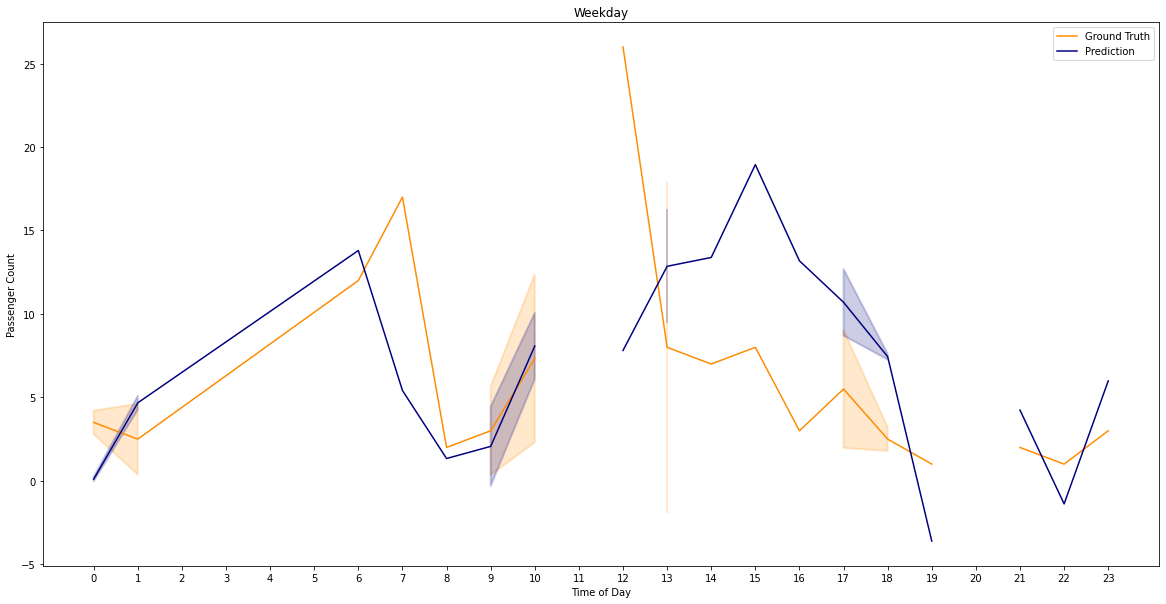

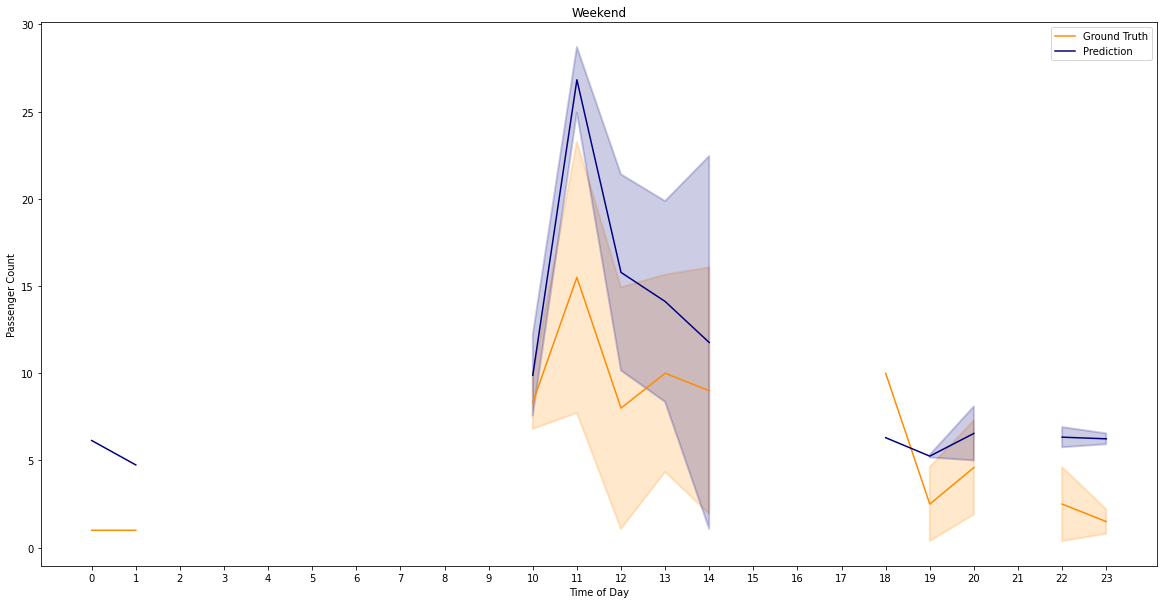

In [34]:
fig_weekday, fig_weekend = experiment_eval.plot_passenger_count_by_time_of_day('test', segment=46, agg='mean')

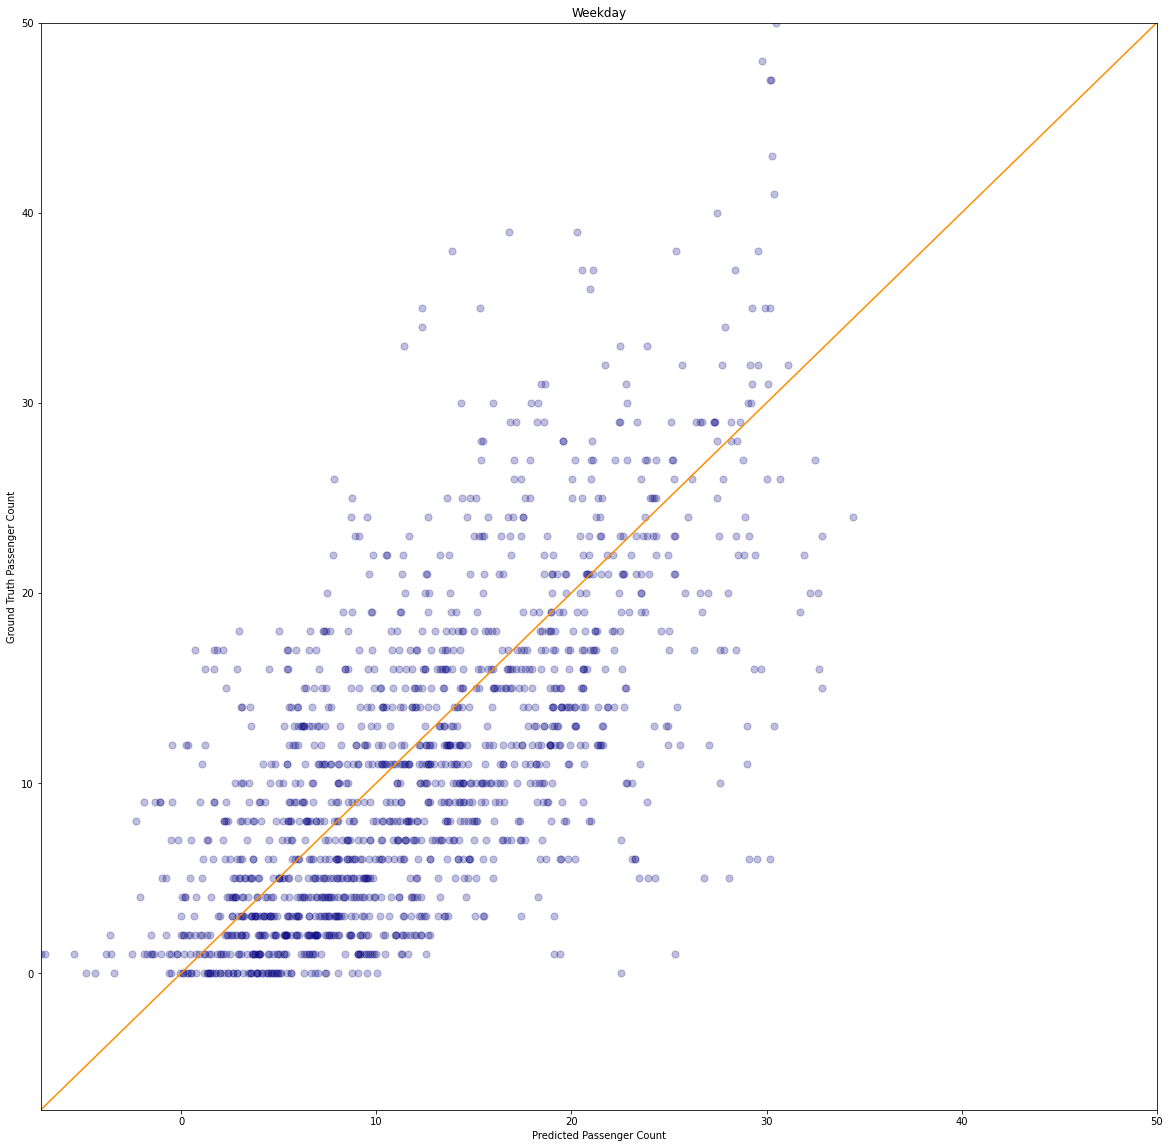

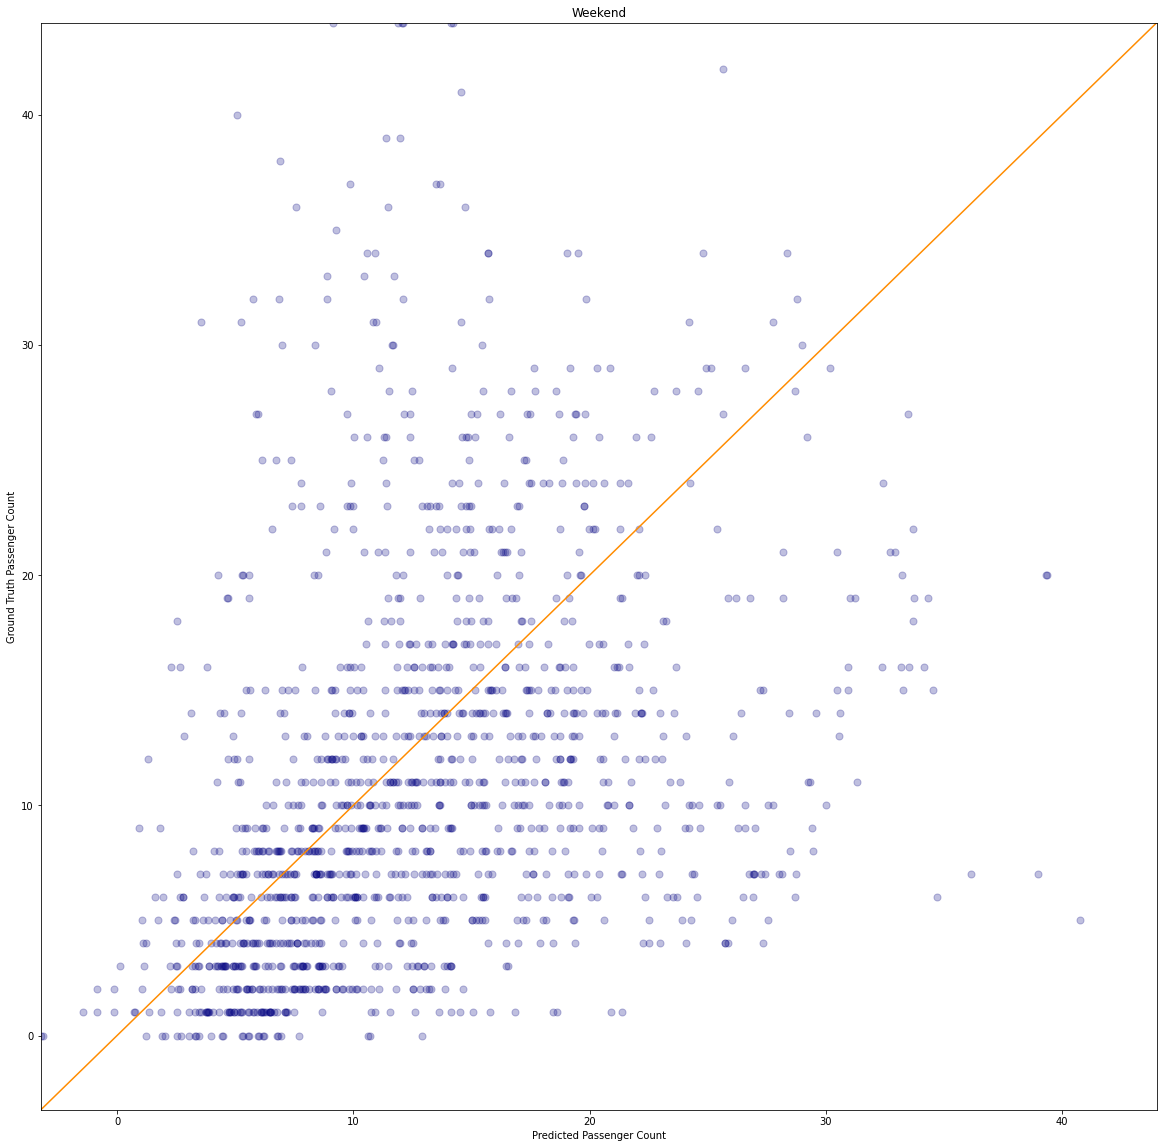

In [35]:
fig_weekday, fig_weekend = experiment_eval.gt_pred_scatter('test', plot='basic', errors='all', n=100, s=50)

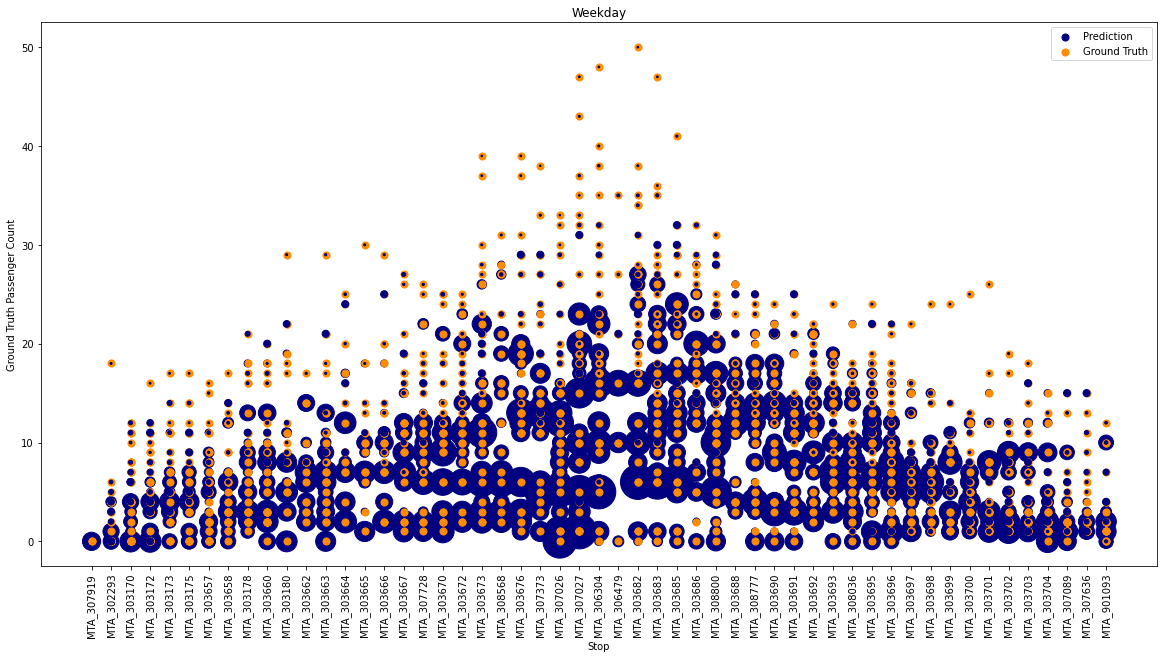

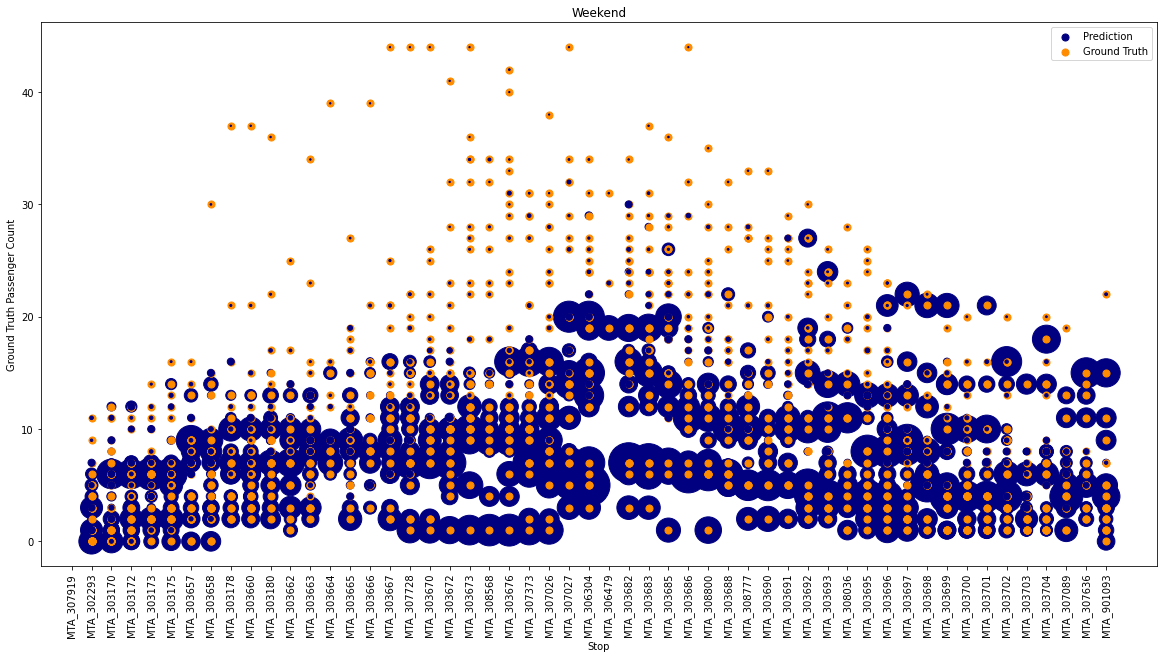

In [36]:
fig_weekday, fig_weekend = experiment_eval.gt_pred_scatter('test', plot='stop', errors='all', n=100, s=50)

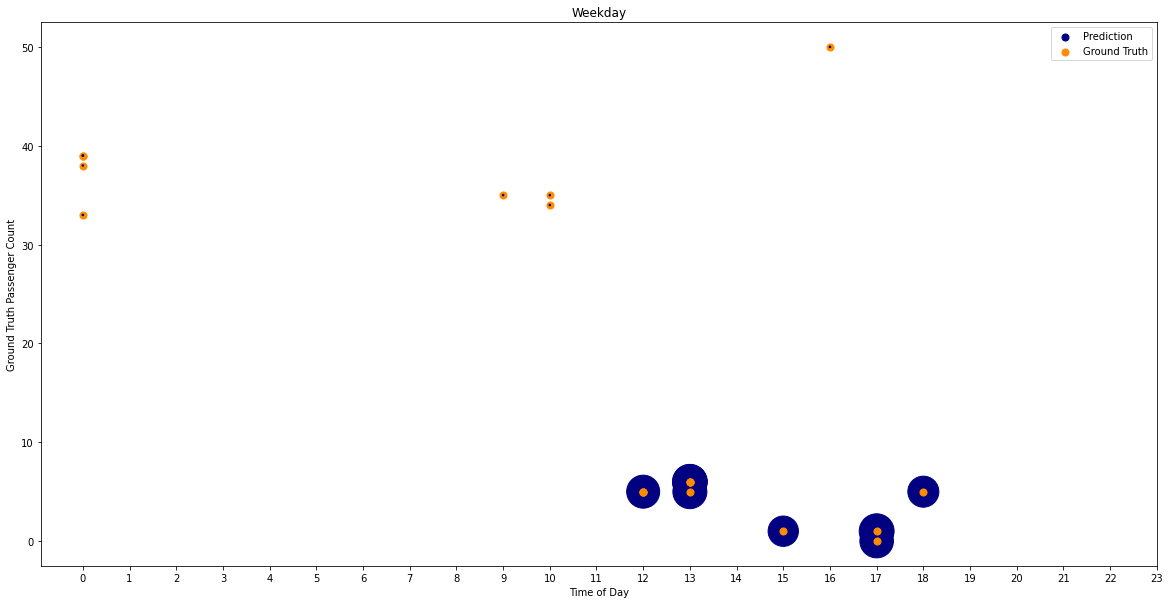

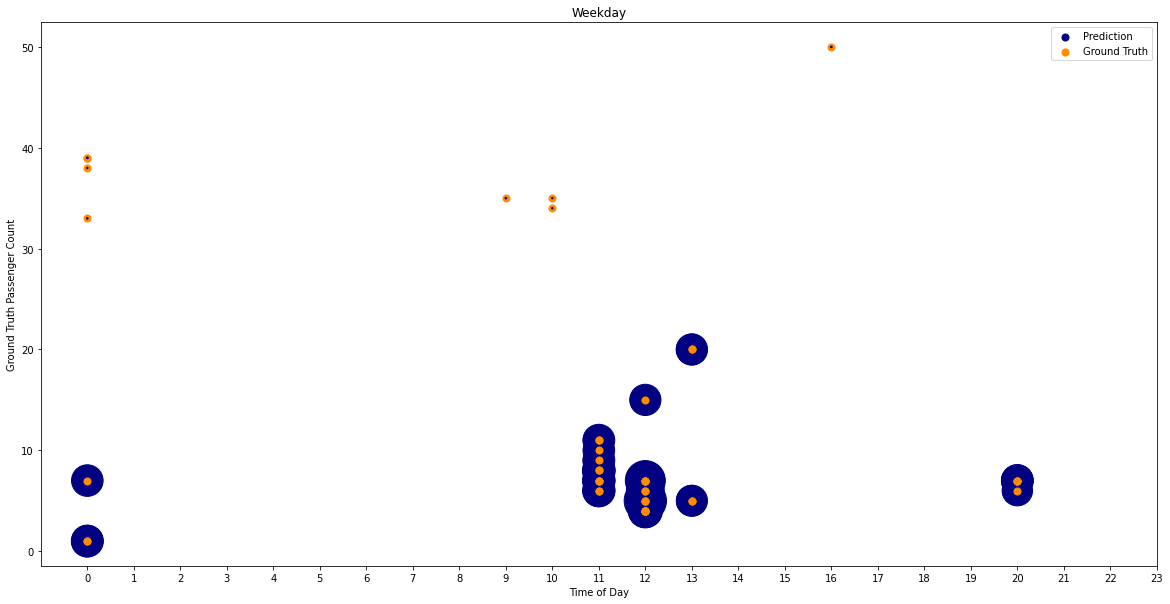

In [37]:
fig_weekday, fig_weekend = experiment_eval.gt_pred_scatter('test', plot='hour', errors='large', n=100, s=50)

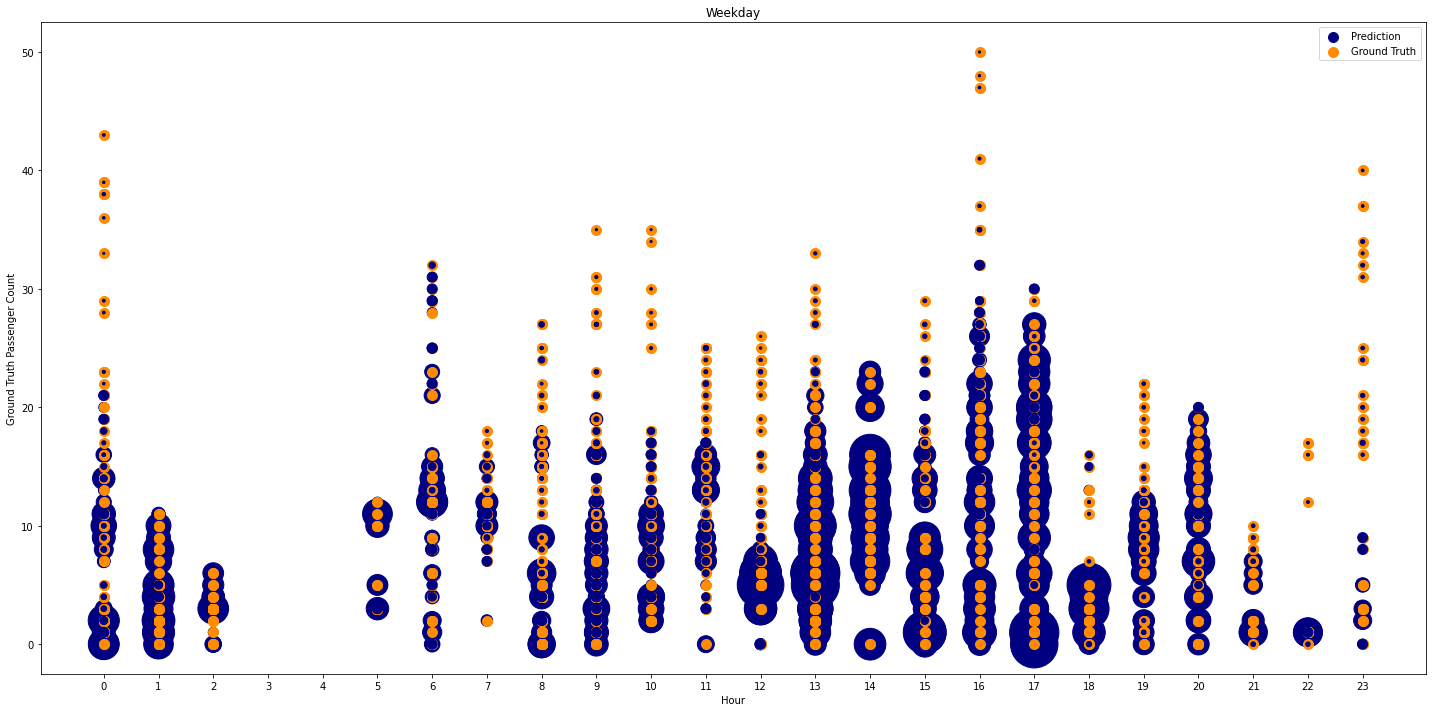

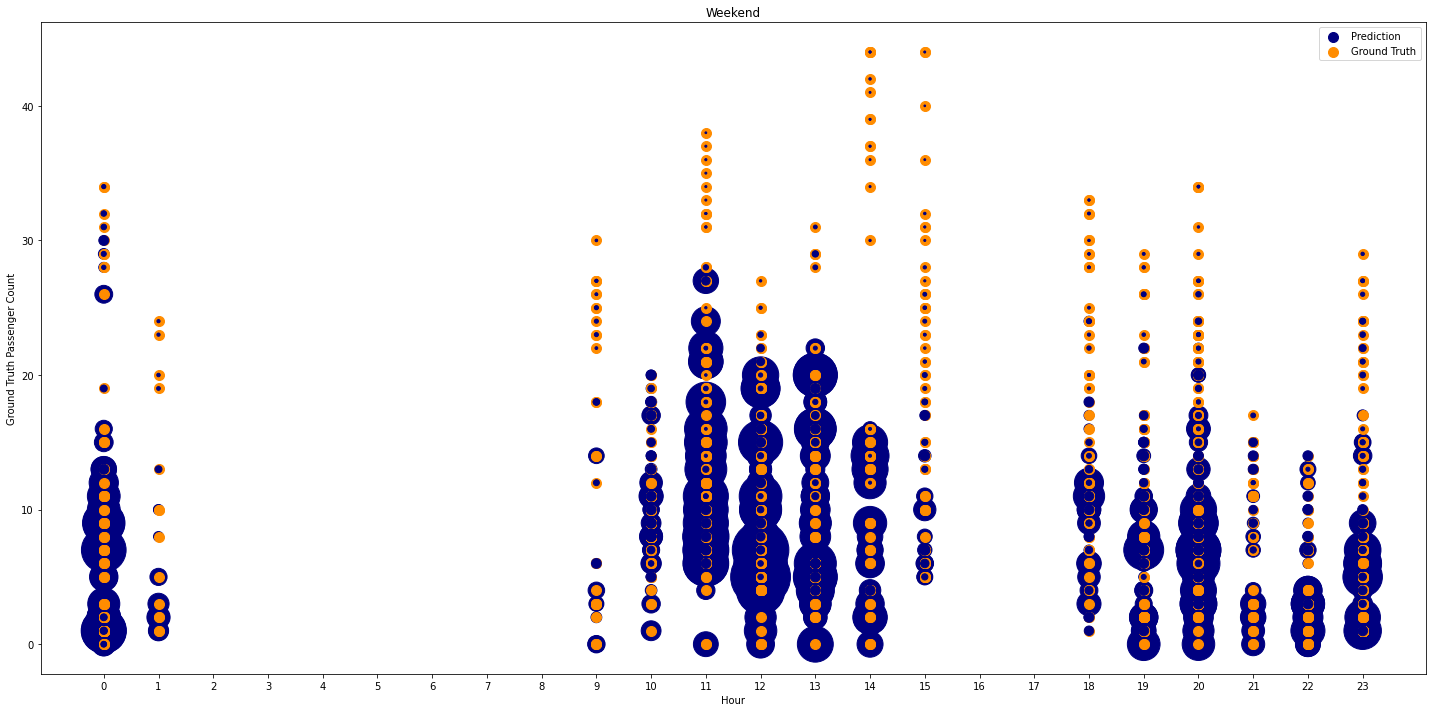

In [208]:
fig_weekday, fig_weekend, fig_datetime = experiment_eval.gt_pred_scatter('test', plot='hour', errors='all', n=100, s=100, gt_y=True)

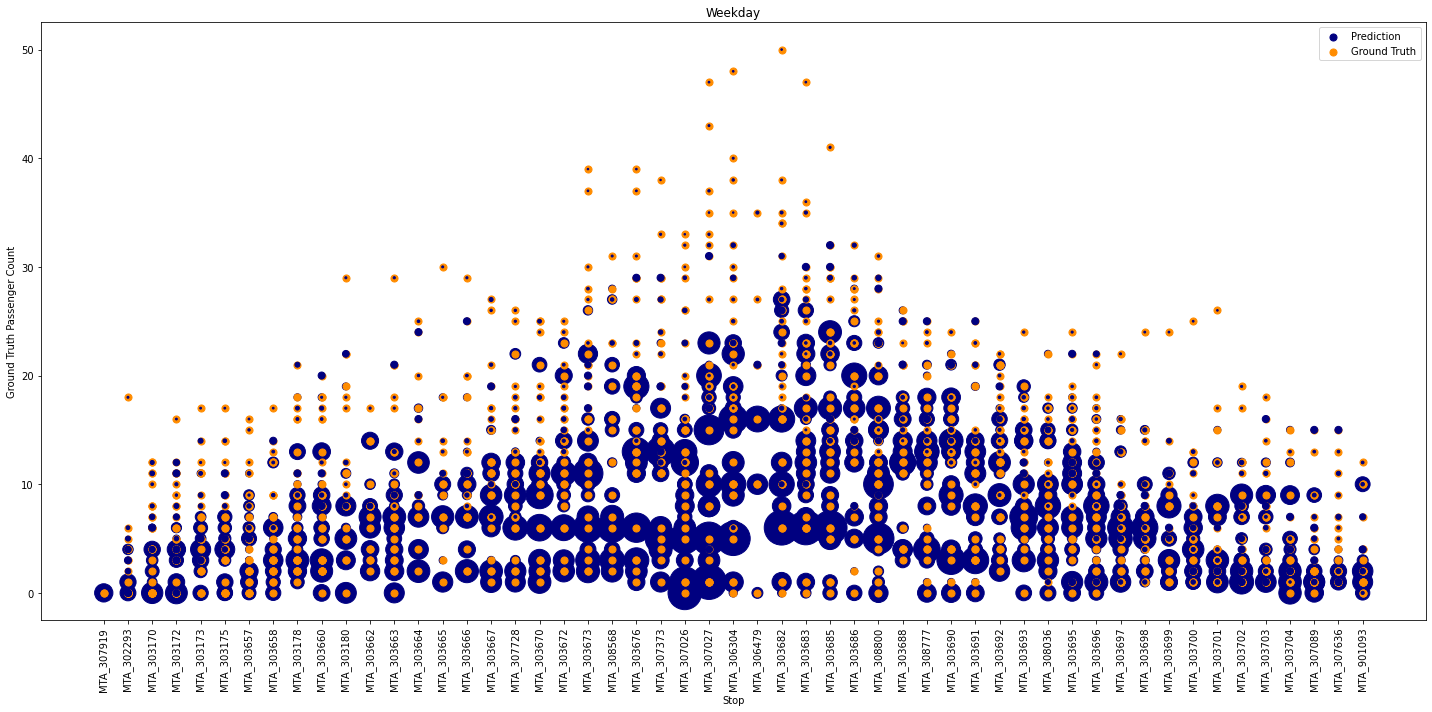

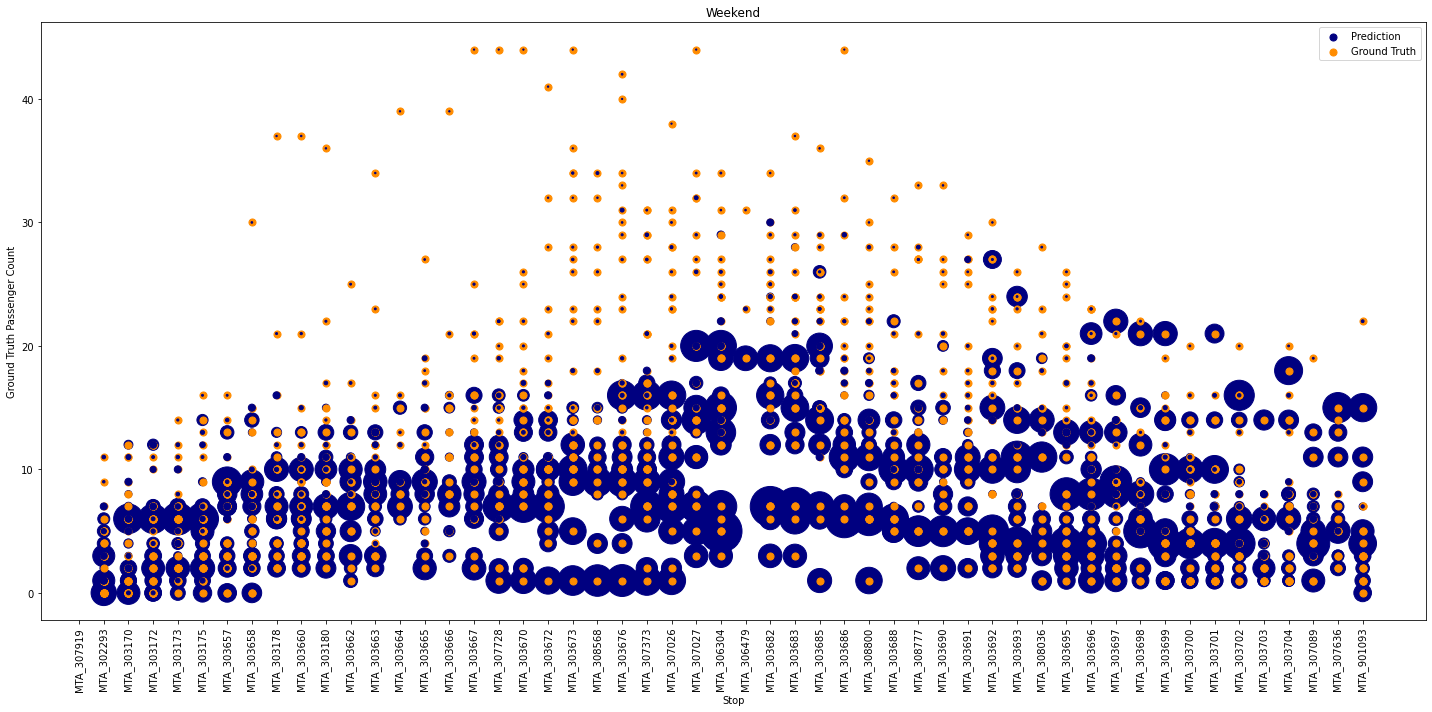

In [201]:
fig_weekday, fig_weekend, fig_datetime = experiment_eval.gt_pred_scatter('test', plot='stop', errors='all', n=100, s=50, gty=True)

In [11]:
bal_acc, cr_dict, cm = experiment_eval.print_classification_metrics('test', segment=None, method='q25q75', num_classes=3, spread_multiple=1, pretty_print=True)

Labels: -1 = sparse | 0 = normal | 1 = crowded


Balanced Accuracy: 0.43900228018714116


Classification Report:
              precision    recall  f1-score   support

          -1       0.43      0.21      0.28       549
           0       0.64      0.69      0.66      1678
           1       0.33      0.41      0.37       555

    accuracy                           0.54      2782
   macro avg       0.47      0.44      0.44      2782
weighted avg       0.54      0.54      0.53      2782



Confusion Matrix:
[[ 116  376   57]
 [ 113 1160  405]
 [  38  287  230]]
